In [4]:
# loading the packages Pkg,VegaDatasets,CSV, DataFrames and updating the package Pkg
using Pkg,VegaDatasets,CSV, DataFrames

In [5]:
## Loading the CSV files ##
df2 = CSV.read("final_dataset2.csv")

1058×33 DataFrame. Omitted printing of 32 columns
│ Row  │ Column1 │
│      │ Int64   │
├──────┼─────────┤
│ 1    │ 1       │
│ 2    │ 2       │
│ 3    │ 3       │
│ 4    │ 4       │
│ 5    │ 5       │
│ 6    │ 6       │
│ 7    │ 7       │
│ 8    │ 8       │
│ 9    │ 9       │
│ 10   │ 10      │
⋮
│ 1048 │ 1048    │
│ 1049 │ 1049    │
│ 1050 │ 1050    │
│ 1051 │ 1051    │
│ 1052 │ 1052    │
│ 1053 │ 1053    │
│ 1054 │ 1054    │
│ 1055 │ 1055    │
│ 1056 │ 1056    │
│ 1057 │ 1057    │
│ 1058 │ 1058    │

In [5]:
### Summary of the dataframe ###
describe(df2)

33×8 DataFrame. Omitted printing of 4 columns
│ Row │ variable                │ mean     │ min            │ median    │
│     │ Symbol                  │ Union…   │ Any            │ Union…    │
├─────┼─────────────────────────┼──────────┼────────────────┼───────────┤
│ 1   │ Column1                 │ 529.5    │ 1              │ 529.5     │
│ 2   │ Movie_Title             │          │ 11:14          │           │
│ 3   │ director_name           │          │ Aaron Seltzer  │           │
│ 4   │ num_critic_for_reviews  │ 139.112  │ 7              │ 114.0     │
│ 5   │ duration                │ 111.775  │ 25             │ 107.0     │
│ 6   │ director_facebook_likes │          │ 0              │           │
│ 7   │ actor_3_facebook_likes  │          │ 0              │           │
│ 8   │ actor_2_name.x          │          │ Aaron Stanford │           │
│ 9   │ actor_1_facebook_likes  │ 7079.62  │ 0              │ 1000.0    │
│ 10  │ gross                   │          │ 100012500      │           │
⋮
│ 23  │ budget                  │          │ 10000          │           │
│ 24  │ title_year              │          │ 1927           │           │
│ 25  │ actor_2_facebook_likes  │ 1781.3   │ 0              │ 658.0     │
│ 26  │ imdb_score              │ 6.68686  │ 1.9            │ 6.8       │
│ 27  │ aspect_ratio            │          │ 1.33           │           │
│ 28  │ movie_facebook_likes    │ 5909.44  │ 0              │ 0.0       │
│ 29  │ imdb_id                 │ 359139.0 │ 17136          │ 1.36057e5 │
│ 30  │ movieid                 │ 21162.8  │ 11             │ 3587.0    │
│ 31  │ genres.y                │          │ Action         │           │
│ 32  │ average_rating          │ 3.24276  │ 0.5            │ 3.33333   │
│ 33  │ tmdbId                  │          │ 10003          │           │

In [6]:
### Removing rows with missing values in the dataframe and replacing NA values with 'missing' in budget and gross columns ##
df2.budget = recode(df2.budget, "NA"=>missing)
df2.gross= recode(df2.gross, "NA"=>missing)
df2.director_facebook_likes= recode(df2.director_facebook_likes, "NA"=>missing)
df2.actor_3_facebook_likes= recode(df2.actor_3_facebook_likes, "NA"=>missing)
df2.title_year= recode(df2.title_year, "NA"=>missing)
df2.aspect_ratio= recode(df2.aspect_ratio, "NA"=>missing)
df2.tmdbId= recode(df2.tmdbId, "NA"=>missing)
df3 = df2[completecases(df2), :]


935×33 DataFrame. Omitted printing of 32 columns
│ Row │ Column1 │
│     │ Int64   │
├─────┼─────────┤
│ 1   │ 1       │
│ 2   │ 2       │
│ 3   │ 3       │
│ 4   │ 4       │
│ 5   │ 5       │
│ 6   │ 6       │
│ 7   │ 7       │
│ 8   │ 8       │
│ 9   │ 9       │
│ 10  │ 10      │
⋮
│ 925 │ 1043    │
│ 926 │ 1044    │
│ 927 │ 1046    │
│ 928 │ 1050    │
│ 929 │ 1051    │
│ 930 │ 1052    │
│ 931 │ 1053    │
│ 932 │ 1054    │
│ 933 │ 1055    │
│ 934 │ 1056    │
│ 935 │ 1058    │

In [15]:
CSV.write("final_dataset.csv", df3,writeheader = true)

"final_dataset.csv"

In [46]:
### Checking the number of unique rows  ###
size(unique(df3),1)


937

In [7]:
using VegaLite,Plots

In [54]:
### Changing the data type of budget to float from string ###
df3.budget = [parse(Float64,x) for x in df3.budget] 

937-element Array{Float64,1}:
      2.6e8 
      2.25e8
      2.0e8 
      1.8e8 
      2.07e8
      2.0e8 
      2.0e8 
      2.0e8 
      1.4e8 
      1.8e8 
      1.78e8
      1.85e8
      1.75e8
      ⋮     
 180000.0   
 150000.0   
  83532.0   
 160000.0   
  60000.0   
  65000.0   
  25000.0   
 230000.0   
  25000.0   
  23000.0   
  10000.0   
   7000.0   

In [55]:
### Changing the data type of gross to float from string ###
df3.gross = [parse(Float64,x) for x in df3.gross] 

937-element Array{Float64,1}:
      2.00807262e8
      4.23032628e8
      1.05219735e8
      7.0083519e7 
      2.1805126e8 
      6.58672302e8
      4.02076689e8
      2.02853933e8
      1.4008085e8 
      2.91709845e8
      1.54985087e8
      5.33316061e8
      2.92979556e8
      ⋮           
 925402.0         
      2.882062e6  
      3.0859e7    
      6.706368e6  
      3.21697e6   
      1.1529368e7 
      1.02466e7   
      3.15113e6   
      2.856622e6  
      1.227508e6  
 673780.0         
 424760.0         

In [8]:
### Changing the data type of director facebook likes to integer from string ###
df3.director_facebook_likes = [parse(Int64,x) for x in df3.director_facebook_likes] 

935-element Array{Int64,1}:
    15
   563
     0
   129
     0
     0
     0
   464
   420
    80
     0
 22000
     0
     ⋮
   373
    56
   365
   909
     0
   293
     0
     0
   119
     0
   397
   291

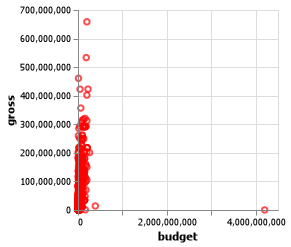

In [56]:
### Using vlplot to look at the relationship between budget and total gross ###
df3|>
@vlplot(
    mark = {:point,color=:red},
    x=:budget,
    y=:gross
)

In [73]:
### Finding the budget value of the outlier ###
x = findmax(df3.budget)
df3.budget[818]

4.2e9

In [75]:
### Finding the gross value of the outlier ###
y = findmin(df3.gross)
df3.gross[818]

211667.0

In [78]:
### Removing the outlier for both budget and gross ###
filtered_budget = filter(x -> x != 4.2e9, df3.budget)
filtered_gross = filter(x -> x != 211667.0, df3.gross)


936-element Array{Float64,1}:
      2.00807262e8
      4.23032628e8
      1.05219735e8
      7.0083519e7 
      2.1805126e8 
      6.58672302e8
      4.02076689e8
      2.02853933e8
      1.4008085e8 
      2.91709845e8
      1.54985087e8
      5.33316061e8
      2.92979556e8
      ⋮           
 925402.0         
      2.882062e6  
      3.0859e7    
      6.706368e6  
      3.21697e6   
      1.1529368e7 
      1.02466e7   
      3.15113e6   
      2.856622e6  
      1.227508e6  
 673780.0         
 424760.0         

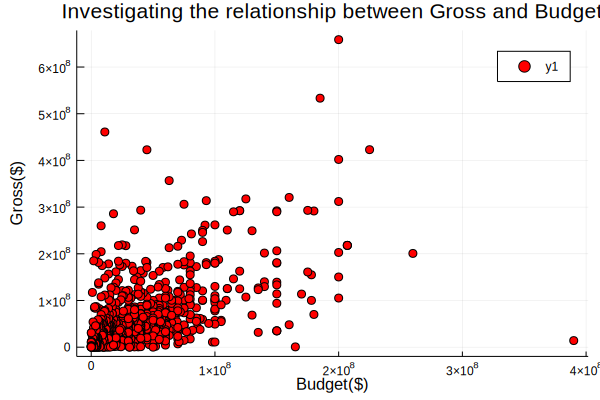

In [85]:
### Using Scatter from the plot package to look at relationship between gross and budget for movies after removing the outlier ###
scatter(filtered_budget,filtered_gross,color = "red", title = "Investigating the relationship between Gross and Budget", xlabel = "Budget(\$)",ylabel = "Gross(\$)")

As shown by the above plot, the movie gross does show a strong increase with an increase in budget. Hence, the two variables are strongly correlated to one another.

In [36]:
typeof(df3.gross)

Array{String,1}

In [37]:
typeof(df3.budget)

Array{Union{Missing, String},1}

In [23]:
typeof(df2.movie_facebook_likes)
typeof(df2.average_rating)

Array{Float64,1}

In [62]:
typeof(df3.director_facebook_likes)

Array{String,1}

In [23]:
describe(df2)

33×8 DataFrame. Omitted printing of 4 columns
│ Row │ variable                │ mean     │ min            │ median    │
│     │ Symbol                  │ Union…   │ Any            │ Union…    │
├─────┼─────────────────────────┼──────────┼────────────────┼───────────┤
│ 1   │ Column1                 │ 525.926  │ 1              │ 524.5     │
│ 2   │ Movie_Title             │          │ 11:14          │           │
│ 3   │ director_name           │          │ Aaron Seltzer  │           │
│ 4   │ num_critic_for_reviews  │ 139.939  │ 7              │ 116.0     │
│ 5   │ duration                │ 111.826  │ 25             │ 107.0     │
│ 6   │ director_facebook_likes │          │ 0              │           │
│ 7   │ actor_3_facebook_likes  │          │ 0              │           │
│ 8   │ actor_2_name.x          │          │ Aaron Stanford │           │
│ 9   │ actor_1_facebook_likes  │ 7139.13  │ 0              │ 1000.0    │
│ 10  │ gross                   │          │ 100012500      │           │
⋮
│ 23  │ budget                  │          │ 1.03e+08       │           │
│ 24  │ title_year              │          │ 1927           │           │
│ 25  │ actor_2_facebook_likes  │ 1796.4   │ 0              │ 661.5     │
│ 26  │ imdb_score              │ 6.68311  │ 1.9            │ 6.8       │
│ 27  │ aspect_ratio            │          │ 1.33           │           │
│ 28  │ movie_facebook_likes    │ 5960.19  │ 0              │ 0.0       │
│ 29  │ imdb_id                 │ 355987.0 │ 17136          │ 1.38114e5 │
│ 30  │ movieid                 │ 20987.1  │ 11             │ 3560.5    │
│ 31  │ genres.y                │          │ Action         │           │
│ 32  │ average_rating          │ 3.23935  │ 0.5            │ 3.33333   │
│ 33  │ tmdbId                  │          │ 10003          │           │

In [1]:
df|>
@vlplot(
    mark = {:point,color=:red},
    x=:director_facebook_likes,
    y=:gross
)

LoadError: UndefVarError: @vlplot not defined

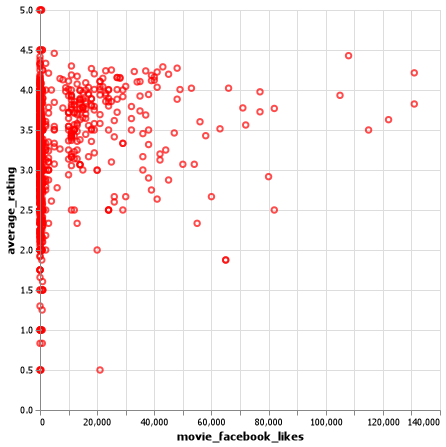

In [59]:
### Examining the relationship between average rating and movie facebook likes ###
df|>
@vlplot(
    mark = {:point,color=:red},
    x=:movie_facebook_likes,
    y=:average_rating,
    height = 400,
    width = 400
)

As shown by the above plot, the average rating does not show a strong increase or relationship with movie facebook likes. 

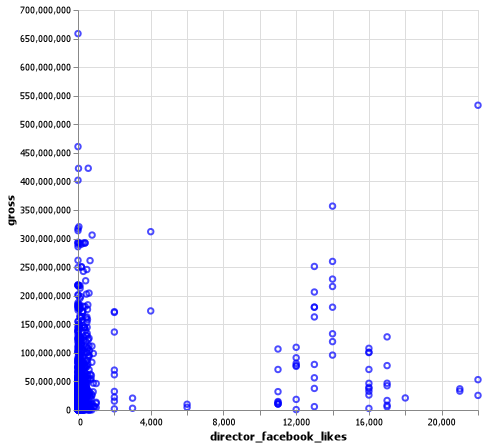

In [64]:
### Examining the relationship between total gross and director facebook likes ###
df3|>
@vlplot(
    mark = {:point,color=:blue},
    x=:director_facebook_likes,
    y=:gross,
    height = 400,
    width = 400
)

As shown by the above plot, the movie gross does not show a strong relationship with director facebook likes. 

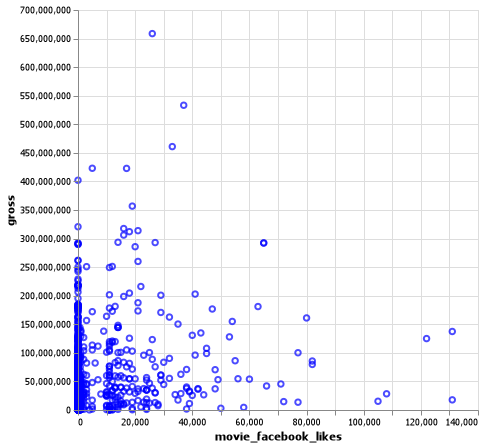

In [66]:
### Examining the relationship between total gross and movie facebook likes ###
df3|>
@vlplot(
    mark = {:point,color=:blue},
    x=:movie_facebook_likes,
    y=:gross,
    height = 400,
    width = 400
)

As shown by the above plot, the gross does show an overall increase with movie facebook likes. However, it is not a strong linear relationship

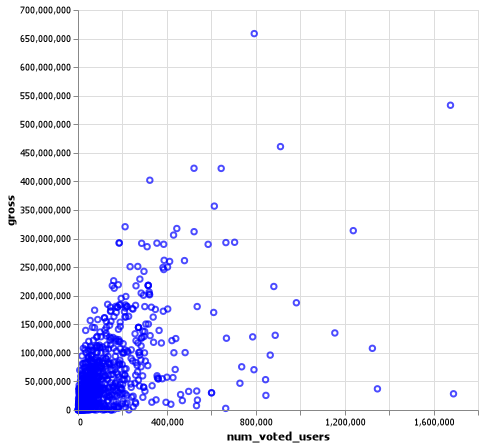

In [65]:
### Examining the relationship between total gross and number of voted users ###
df3|>
@vlplot(
    mark = {:point,color=:blue},
    x=:num_voted_users,
    y=:gross,
    height = 400,
    width = 400
)

As shown by the above plot, the gross increases with number of voted users. This can be explained by the fact that in order for users to vote for a movie to rate it, they would've needed to watch the movie, hence, resulting in the increased gross. 

In [ ]:
### Examining the relationship between total gross and number of voted users ###
df3|>
@vlplot(
    mark = {:point,color=:blue},
    x=:director_facebook_likes,
    y=:average_rating,
    height = 400,
    width = 400
)